In [1]:
import pandas as pd



cols = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv('/kaggle/input/uci-heart-diseases/processed.cleveland.data', names=cols, na_values="?")

print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [2]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [4]:
df=df.dropna(subset=['ca','thal'])
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
"""
according to the uci data website (age, trestbps, chol, thalach, oldpeak) these were nums 
and (cp,restecg,slope,ca,thal, sex, fbs, exang) were catg.


"""

num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"] #standerizer
cat_cols = ["cp", "restecg", "slope", "ca", "thal"] #need one_hot enc
bin_cols = ["sex", "fbs", "exang"] #binary already 0,1 no need.

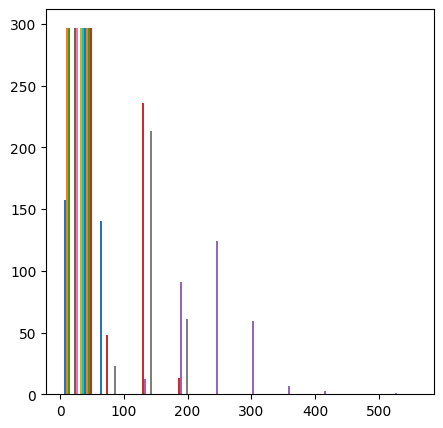

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(df)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler=StandardScaler()

df[num_cols]=scaler.fit_transform(df[num_cols])

encoder=OneHotEncoder(sparse=False,handle_unknown='ignore' )
encoded=encoder.fit_transform(df[cat_cols])

encoded_df=pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=df.index)

df=df.drop(columns=cat_cols).join(encoded_df)

df

/tmp/ipykernel_36/3735583221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols]=scaler.fit_transform(df[num_cols])
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,0.0,0.468418,-0.122330,0.0,-1.161395,1.0,-0.734914,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
298,-1.056185,1.0,-1.223355,0.320744,0.0,-0.768432,0.0,0.124076,1,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
299,1.489615,1.0,0.693988,-1.047008,1.0,-0.375469,0.0,2.013854,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,0.272059,1.0,-0.095506,-2.241384,0.0,-1.510696,1.0,0.124076,3,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


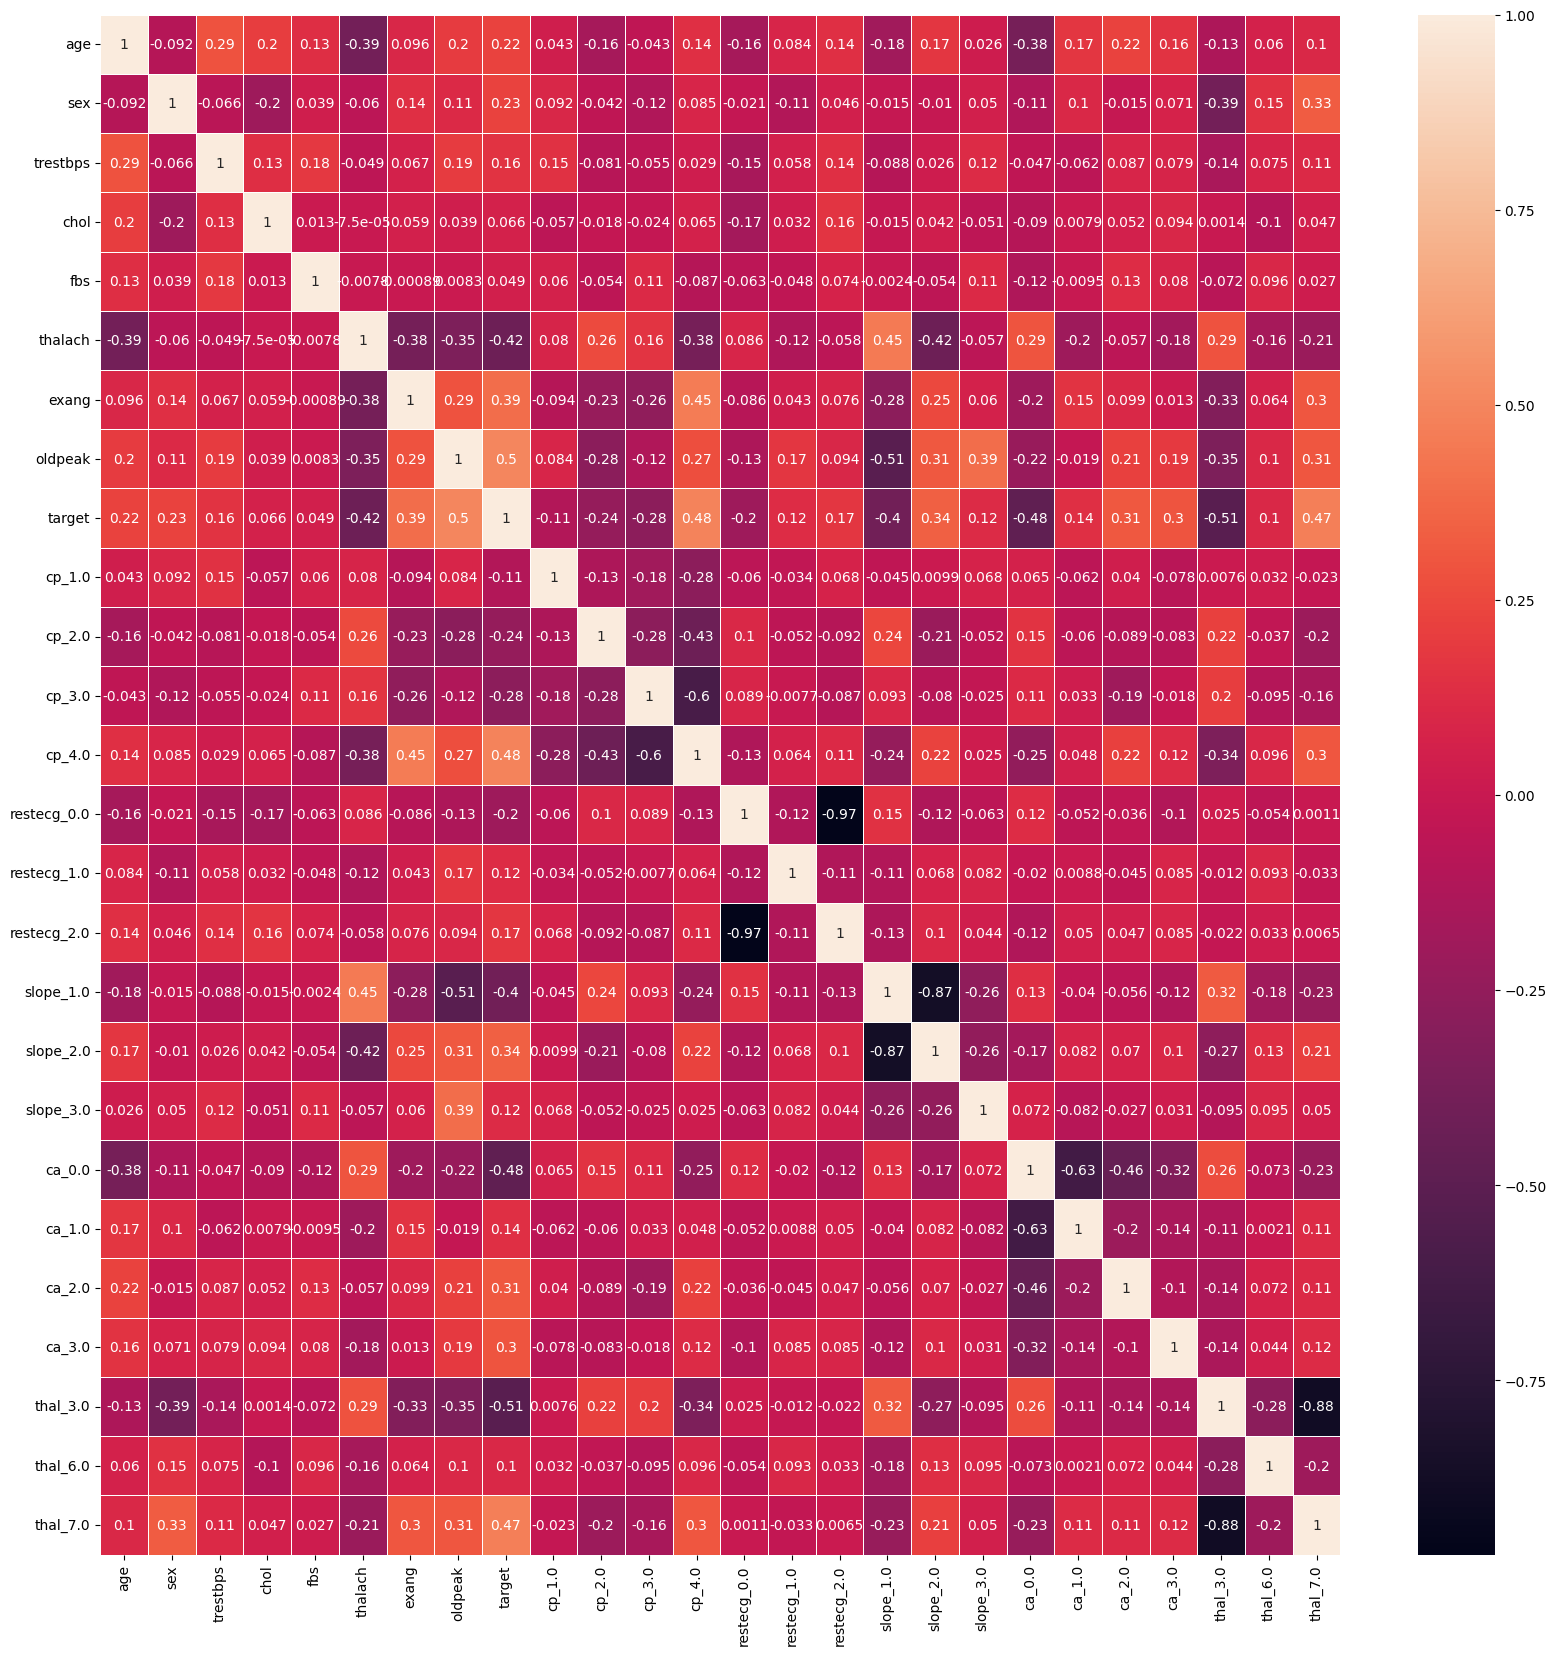

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.show()

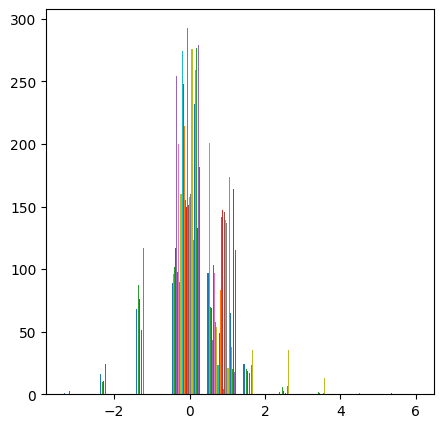

In [11]:


plt.figure(figsize=(5,5))
plt.hist(df)
plt.show()


Text(0.5, 1.0, 'Heart diseases based on sex')

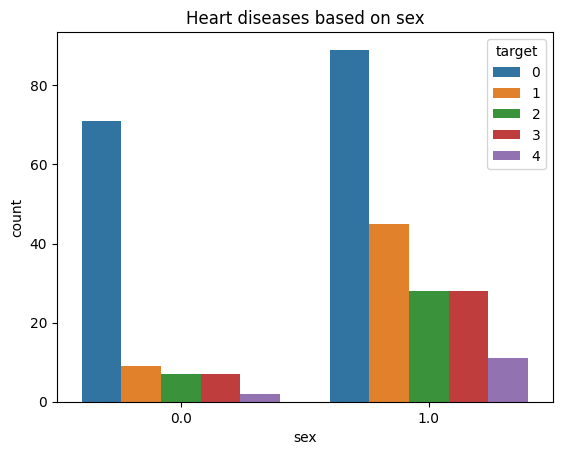

In [12]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart diseases based on sex")
#zero=female, one=male

Text(0.5, 1.0, 'Heart diseases based on oldpeak')

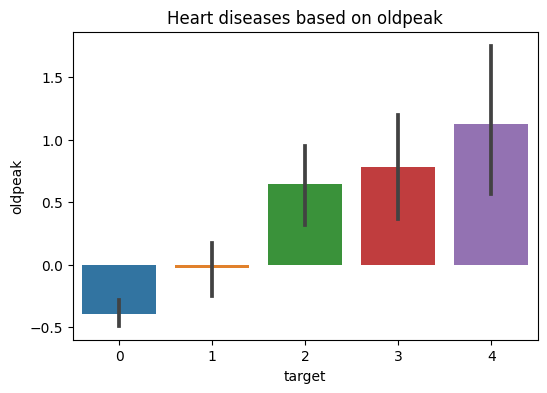

In [13]:

plt.figure(figsize=(6,4))
sns.barplot(x="target", y="oldpeak", data=df, estimator="mean")
plt.title("Heart diseases based on oldpeak")

In [15]:
import pickle

with open ('/kaggle/working/processed.pkl', 'wb') as f:
    pickle.dump(df,f)
    
